In [1]:
!pip install pyplr
!pip install neurokit2
!pip install fastnumbers
!pip install datamatrix

import sys
sys.path.append("../Pupillengröße/Skripte/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging as log
from preprocessfunction2 import PLR2d
from preprocessfunction3 import PLR3d
import checkdata
import importlib
from IPython.display import display
def display_all(df):
    from IPython.display import HTML, display
    IPython.display(IPython.HTML(df.to_html()))


In [2]:
# reload checkdata
importlib.reload(checkdata)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200 
subject_id="PJ02_1_Ruhe"
data_dir="../data/groesse/3.4Stimulation/"
config=checkdata.DataConfig(window_duration=30)
eye0=checkdata.prepare(data_dir,subject_id,0,config)
eye1=checkdata.prepare(data_dir,subject_id,1,config)
# checkdata.plot(eye0[0],"auge 0 (0)")
# display(eye0[0])


### Use datamatrix from pydatamatrix.eu to fill in blinking gaps

pandas.core.series.Series

<Axes: xlabel='pupil_timestamp'>

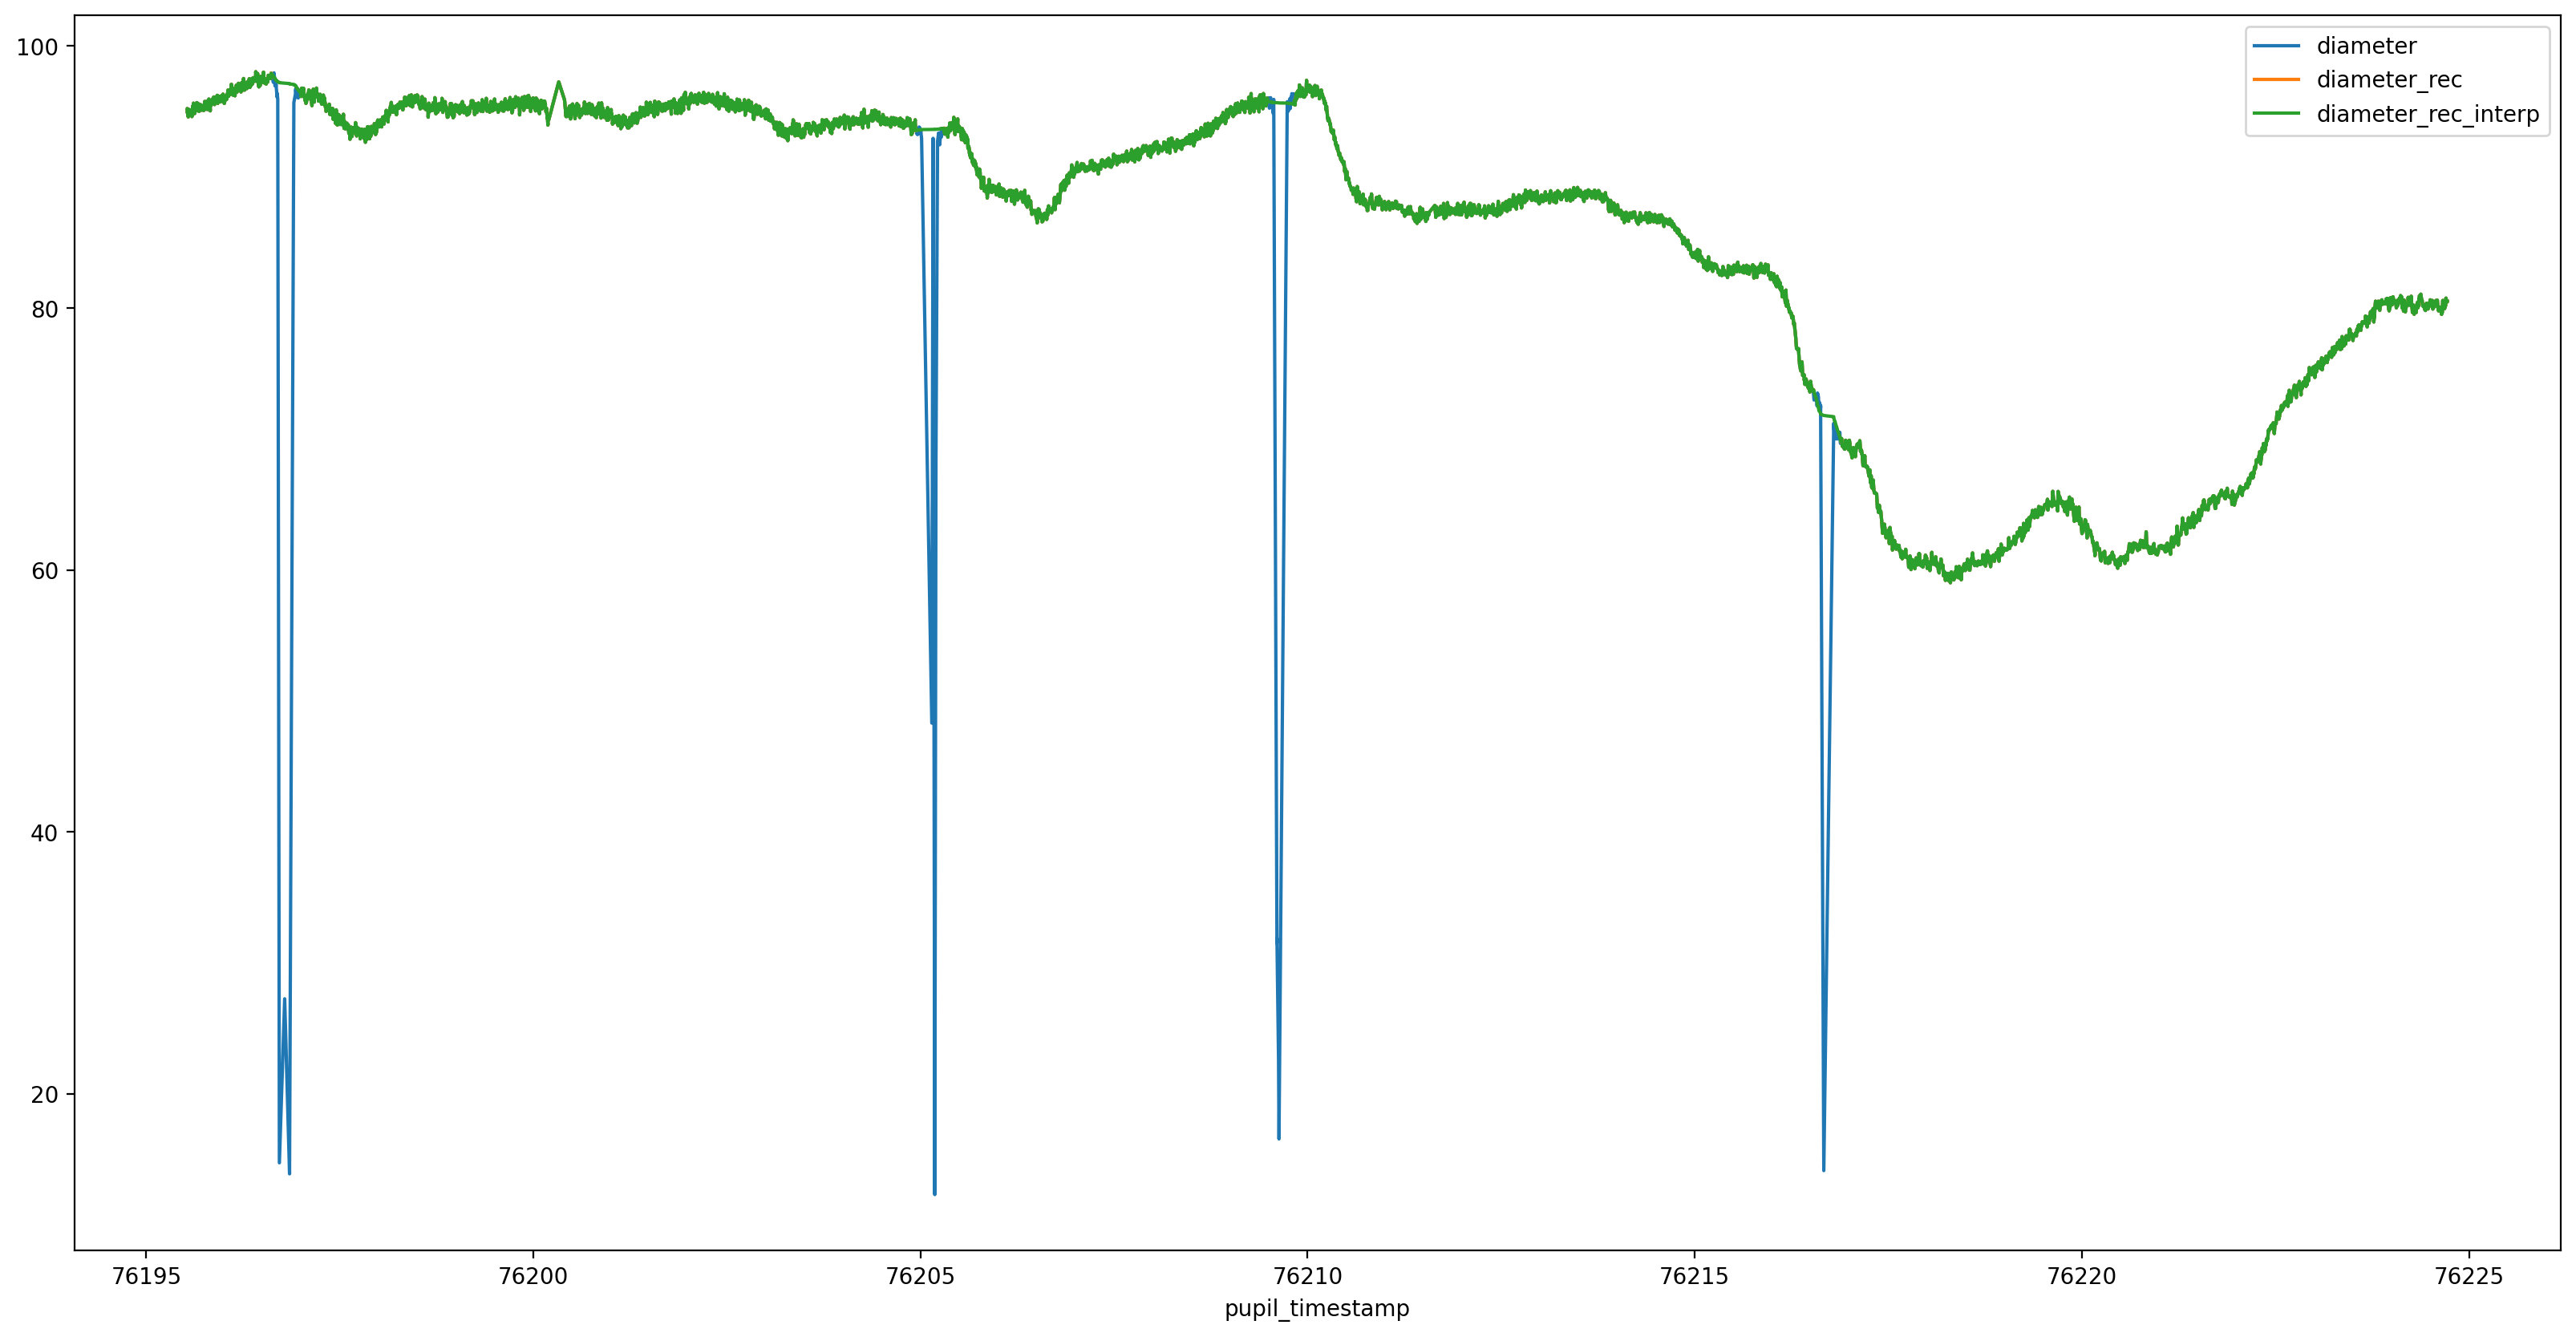

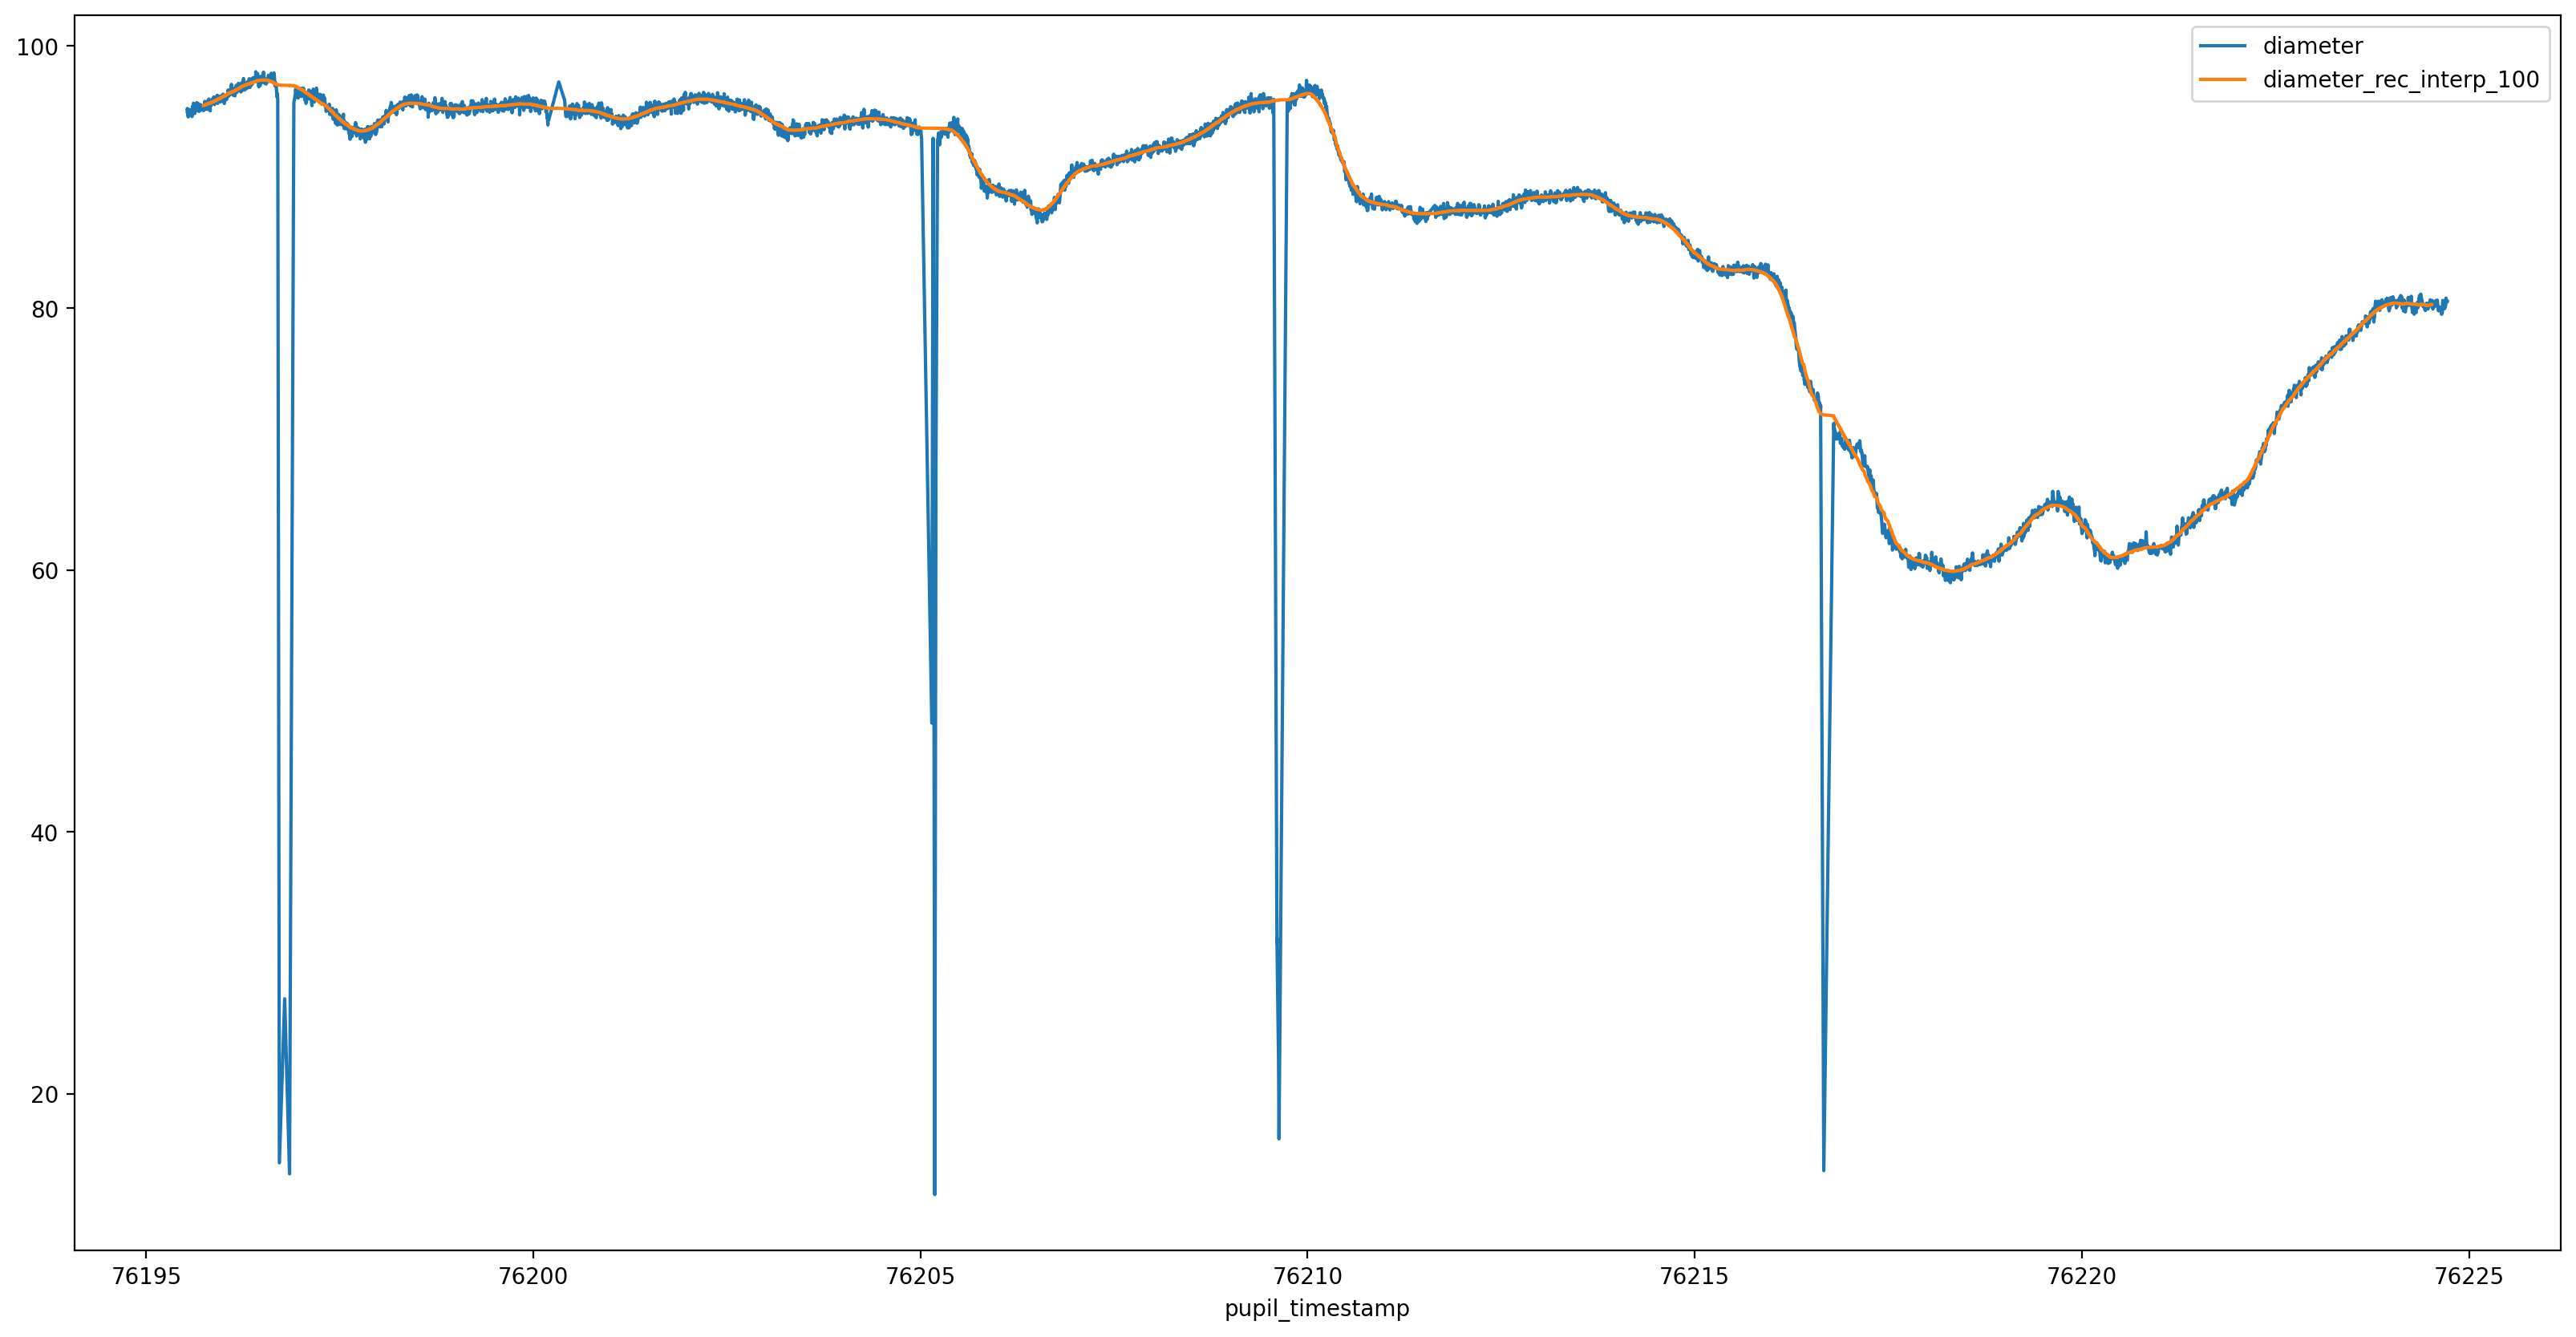

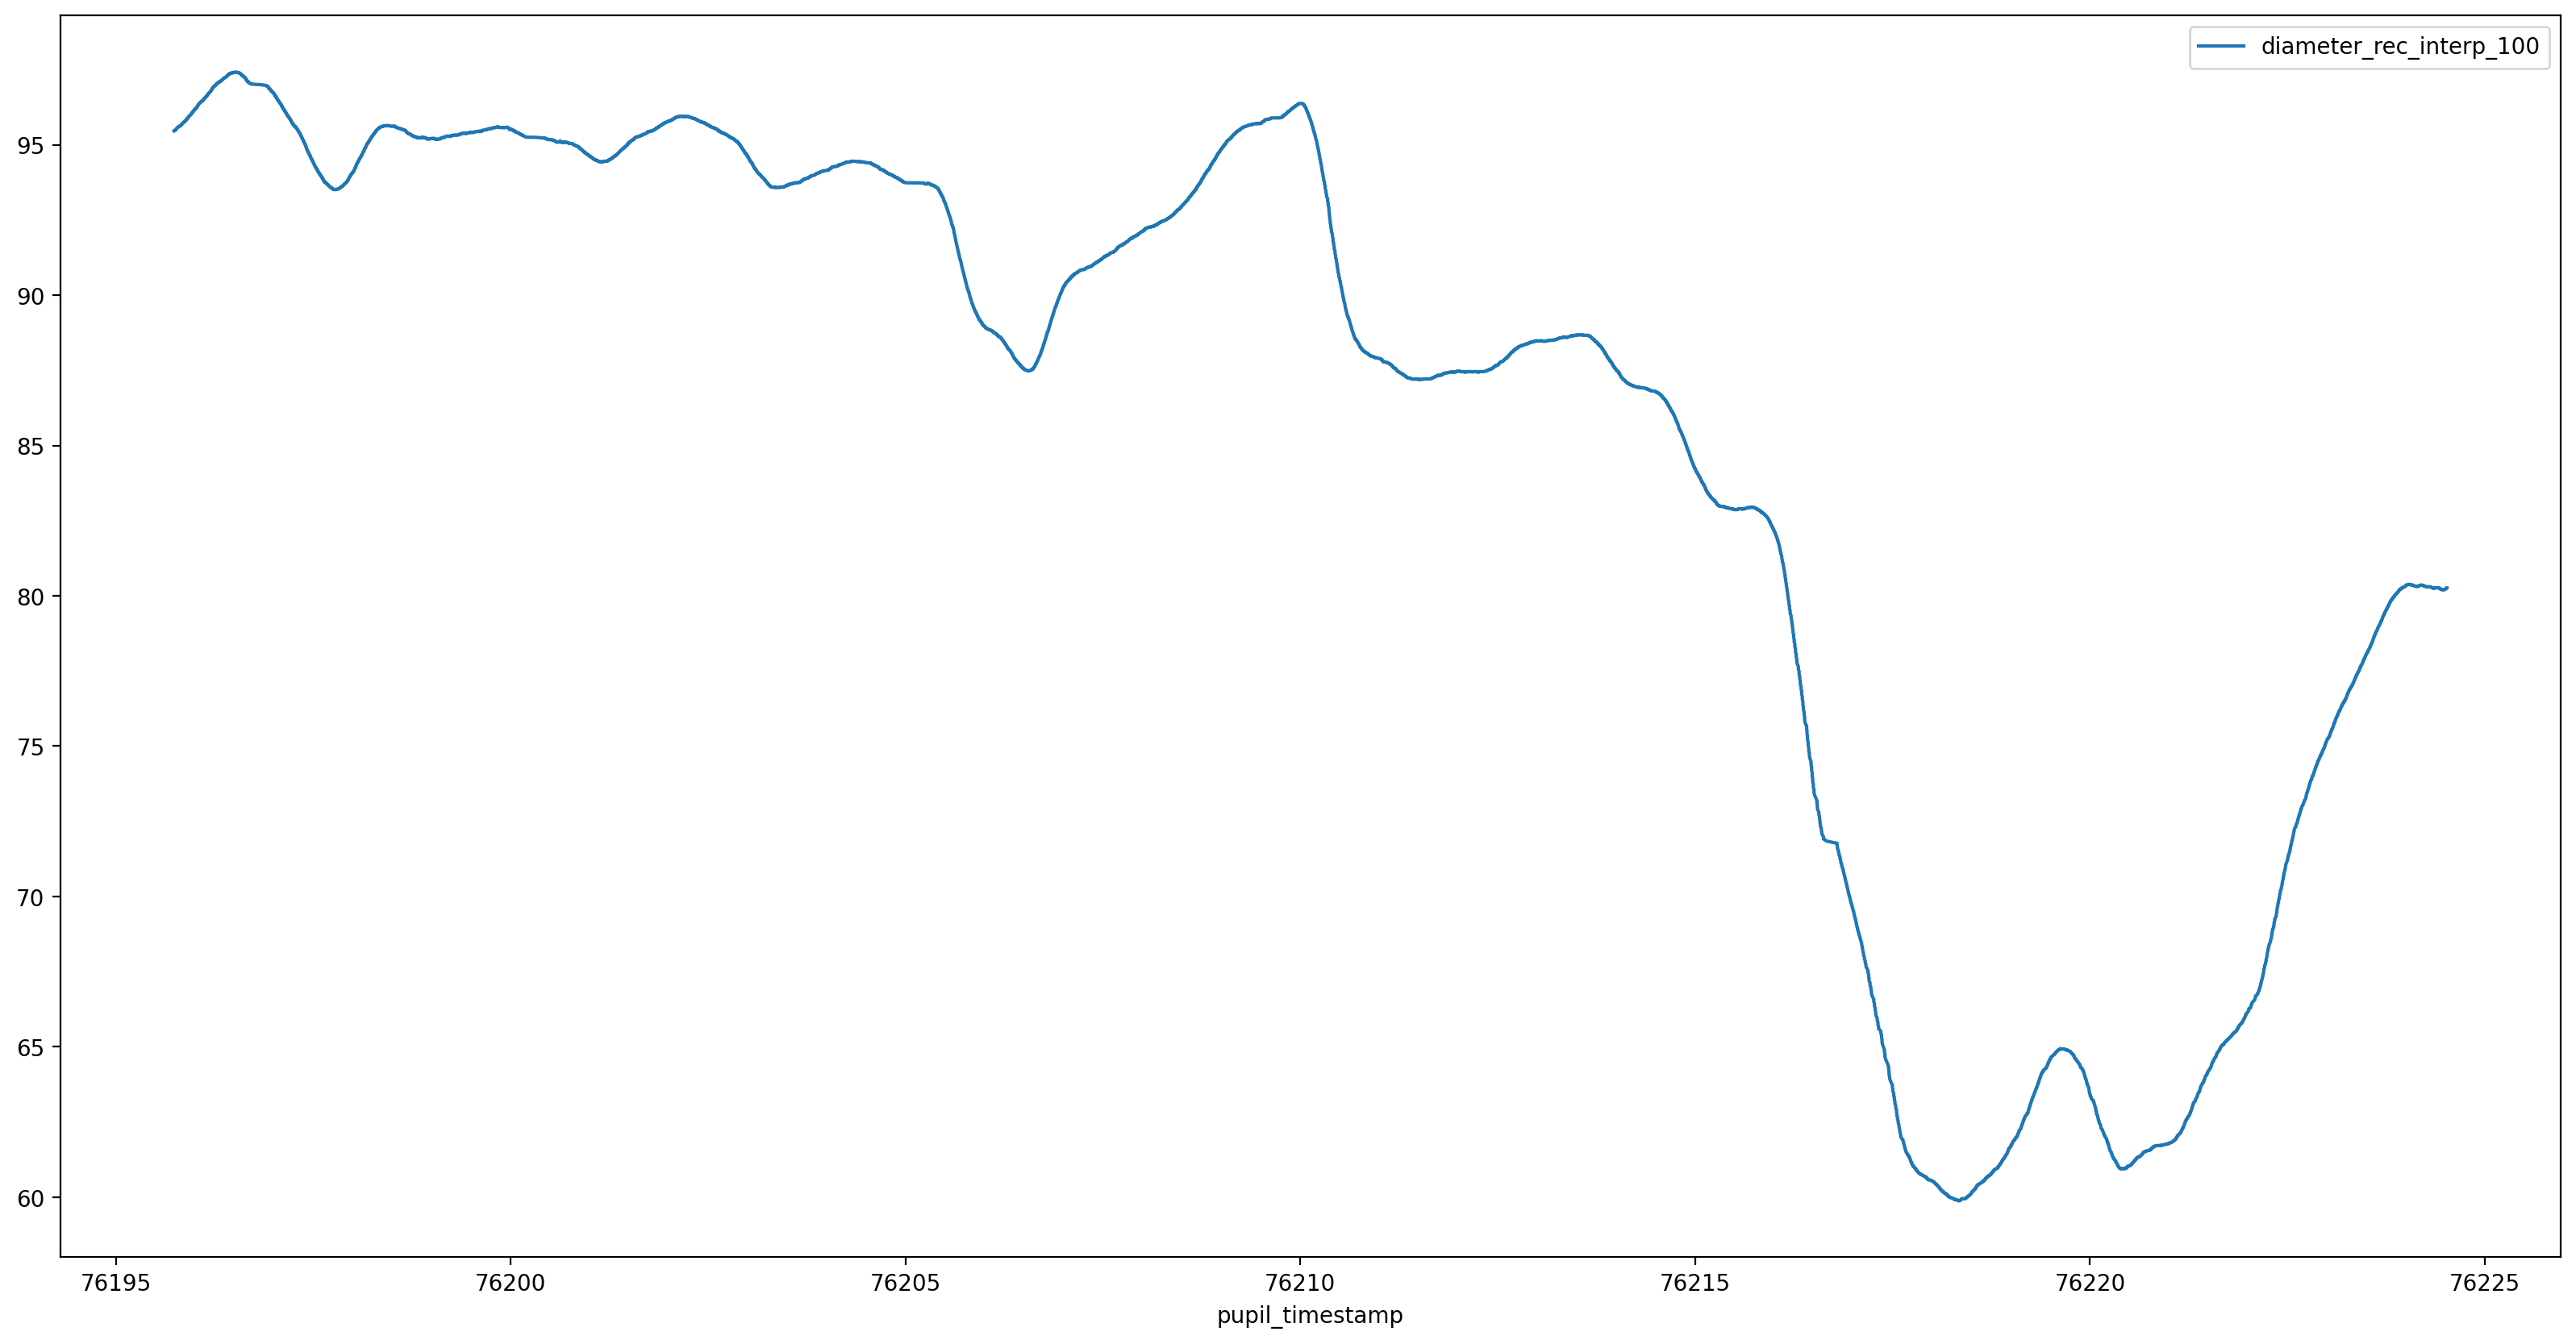

In [23]:
importlib.reload(checkdata)
# Let's try to remove blinks and filter the result
what=eye0[0]

def reconstruct(eye, window_size=100):
    # Remove blinks.
    eye['diameter_rec']=checkdata.blinkreconstruct(eye['diameter'], mode='advanced')
    # blinkreconstruct replaces the bliks with NaN with mode='advanced',
    # so we interpolate the gaps and low pass the result to obtain something. 
    eye['diameter_rec_interp']=eye['diameter_rec'].interpolate(method='linear')
    # Use moving average + recenter as low pass.
    eye['diameter_rec_interp_100']=eye['diameter_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)

    
# How does it look like?
eye=eye0[0]
reconstruct(eye)

sub=eye.plot(x='pupil_timestamp', y='diameter', kind='line')
sub=eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec', kind='line')
eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp', kind='line')

sub=eye.plot(x='pupil_timestamp', y='diameter', kind='line')
eye.plot(ax=sub,x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')
# Make an extra plot to see how the smoothed data looks like
eye.plot(x='pupil_timestamp', y='diameter_rec_interp_100', kind='line')


pandas.core.series.Series

<Axes: xlabel='pupil_timestamp'>

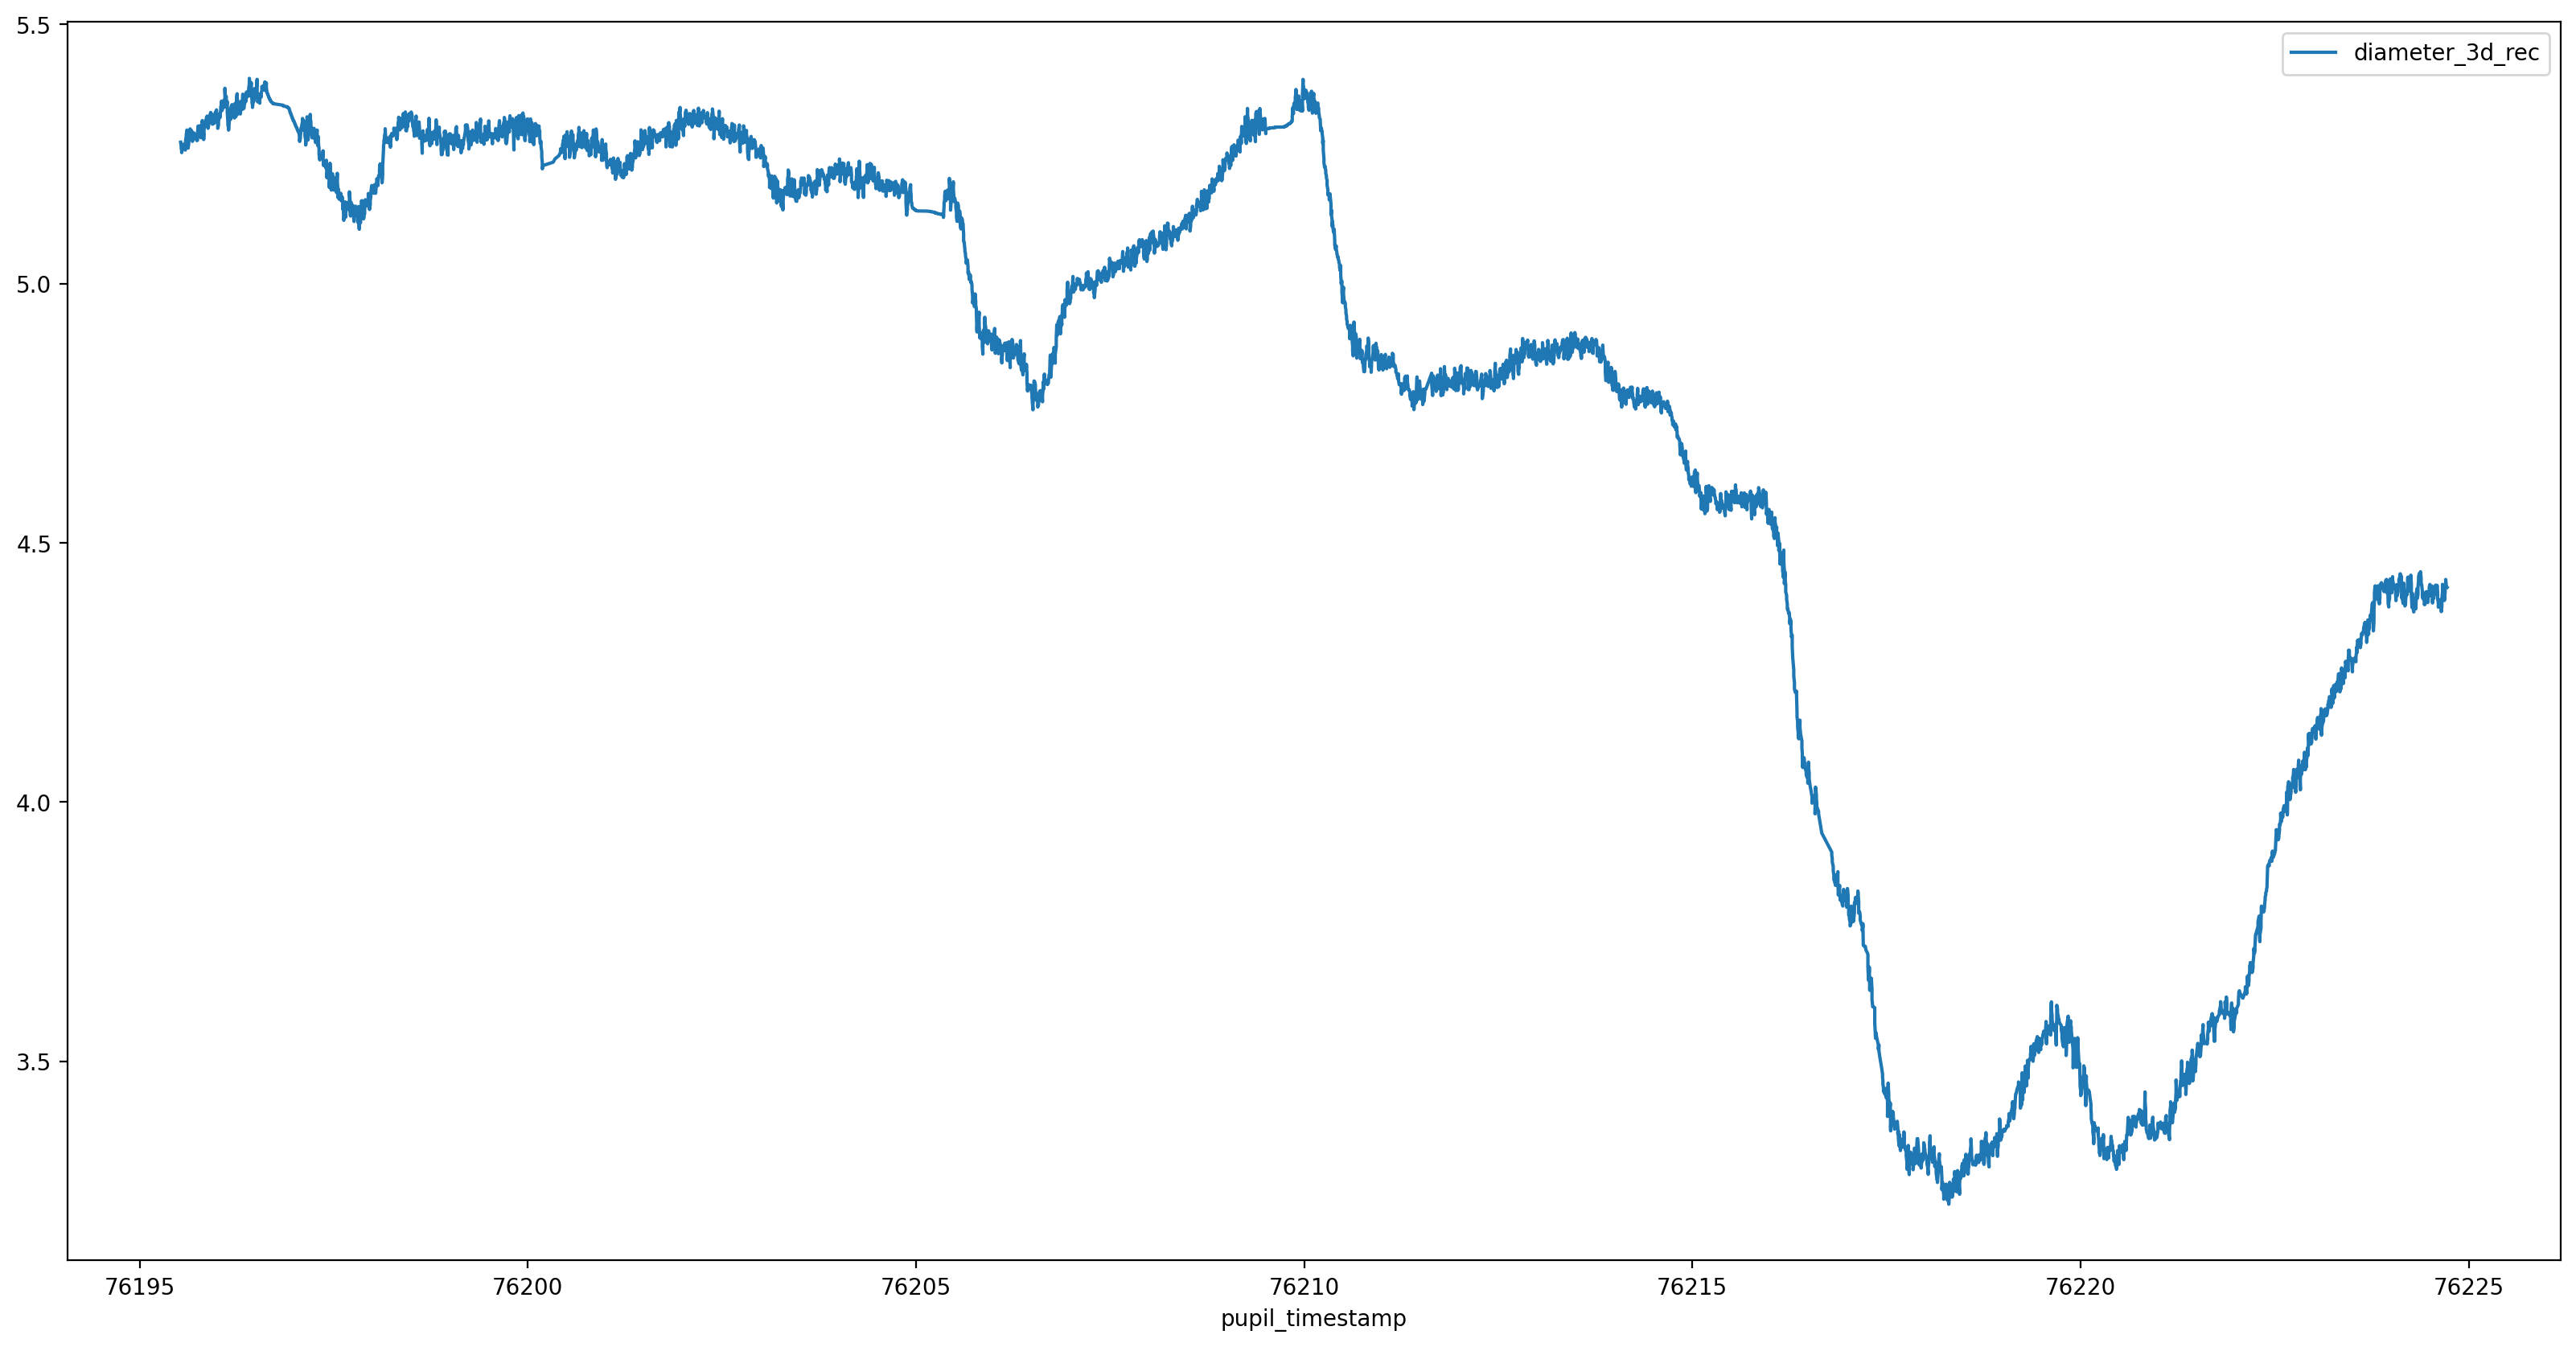

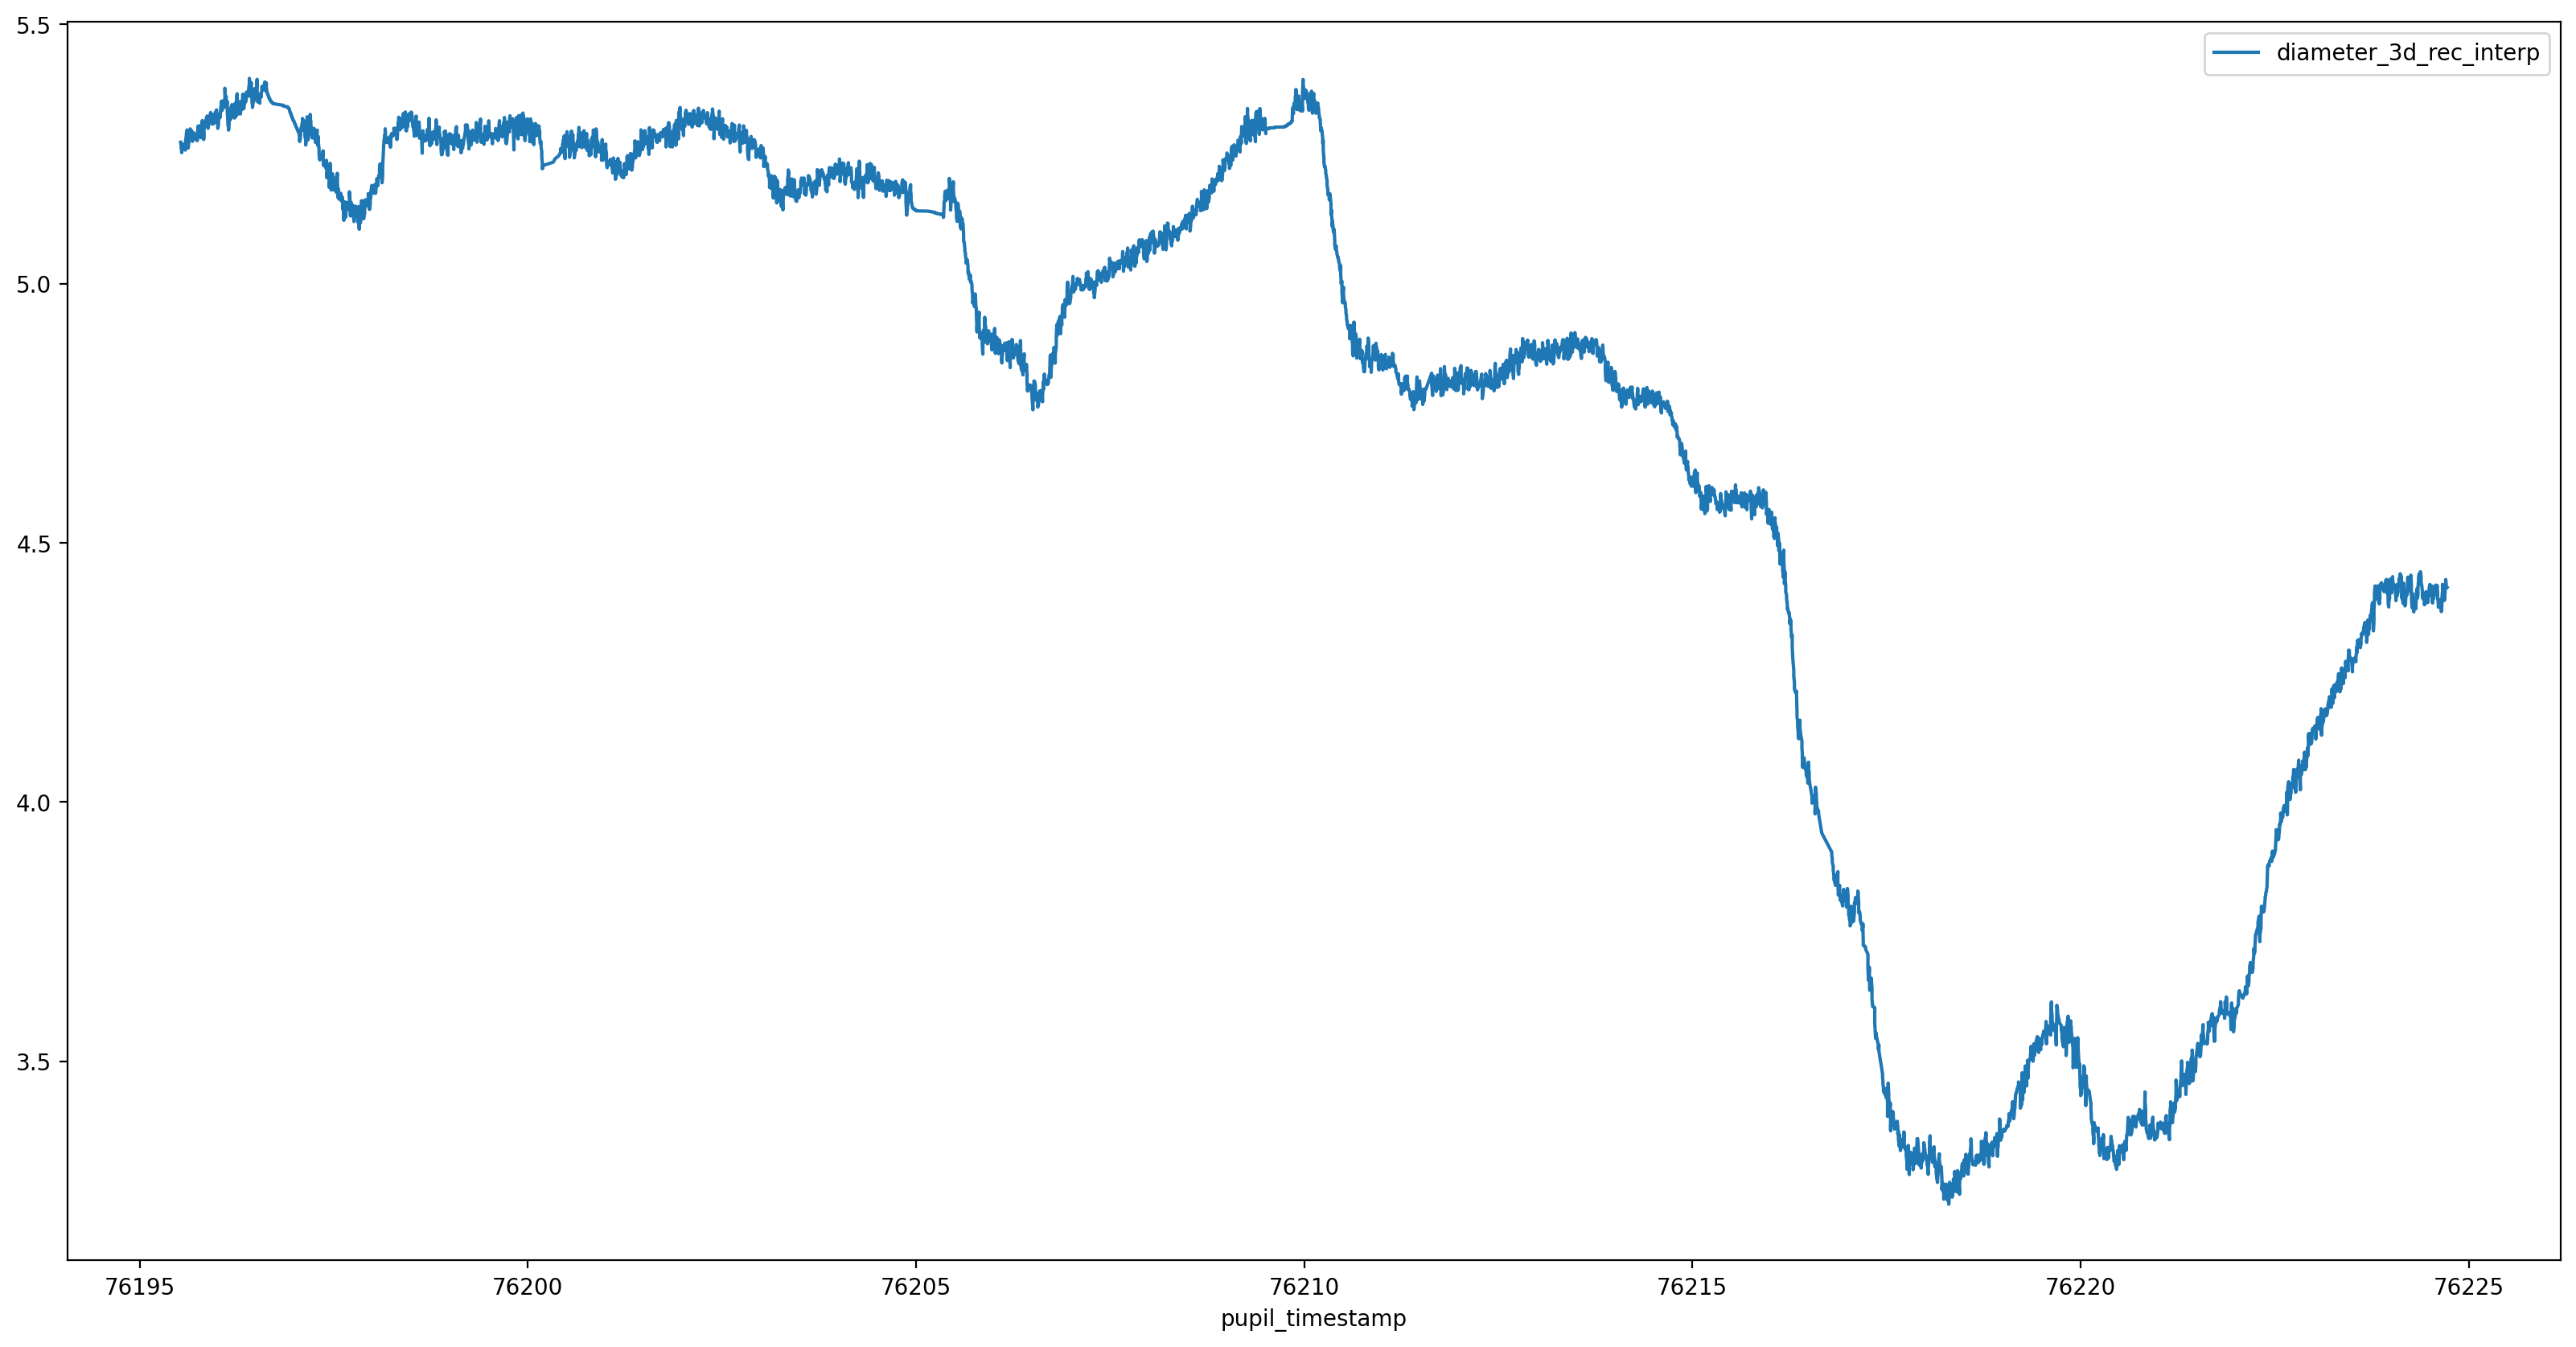

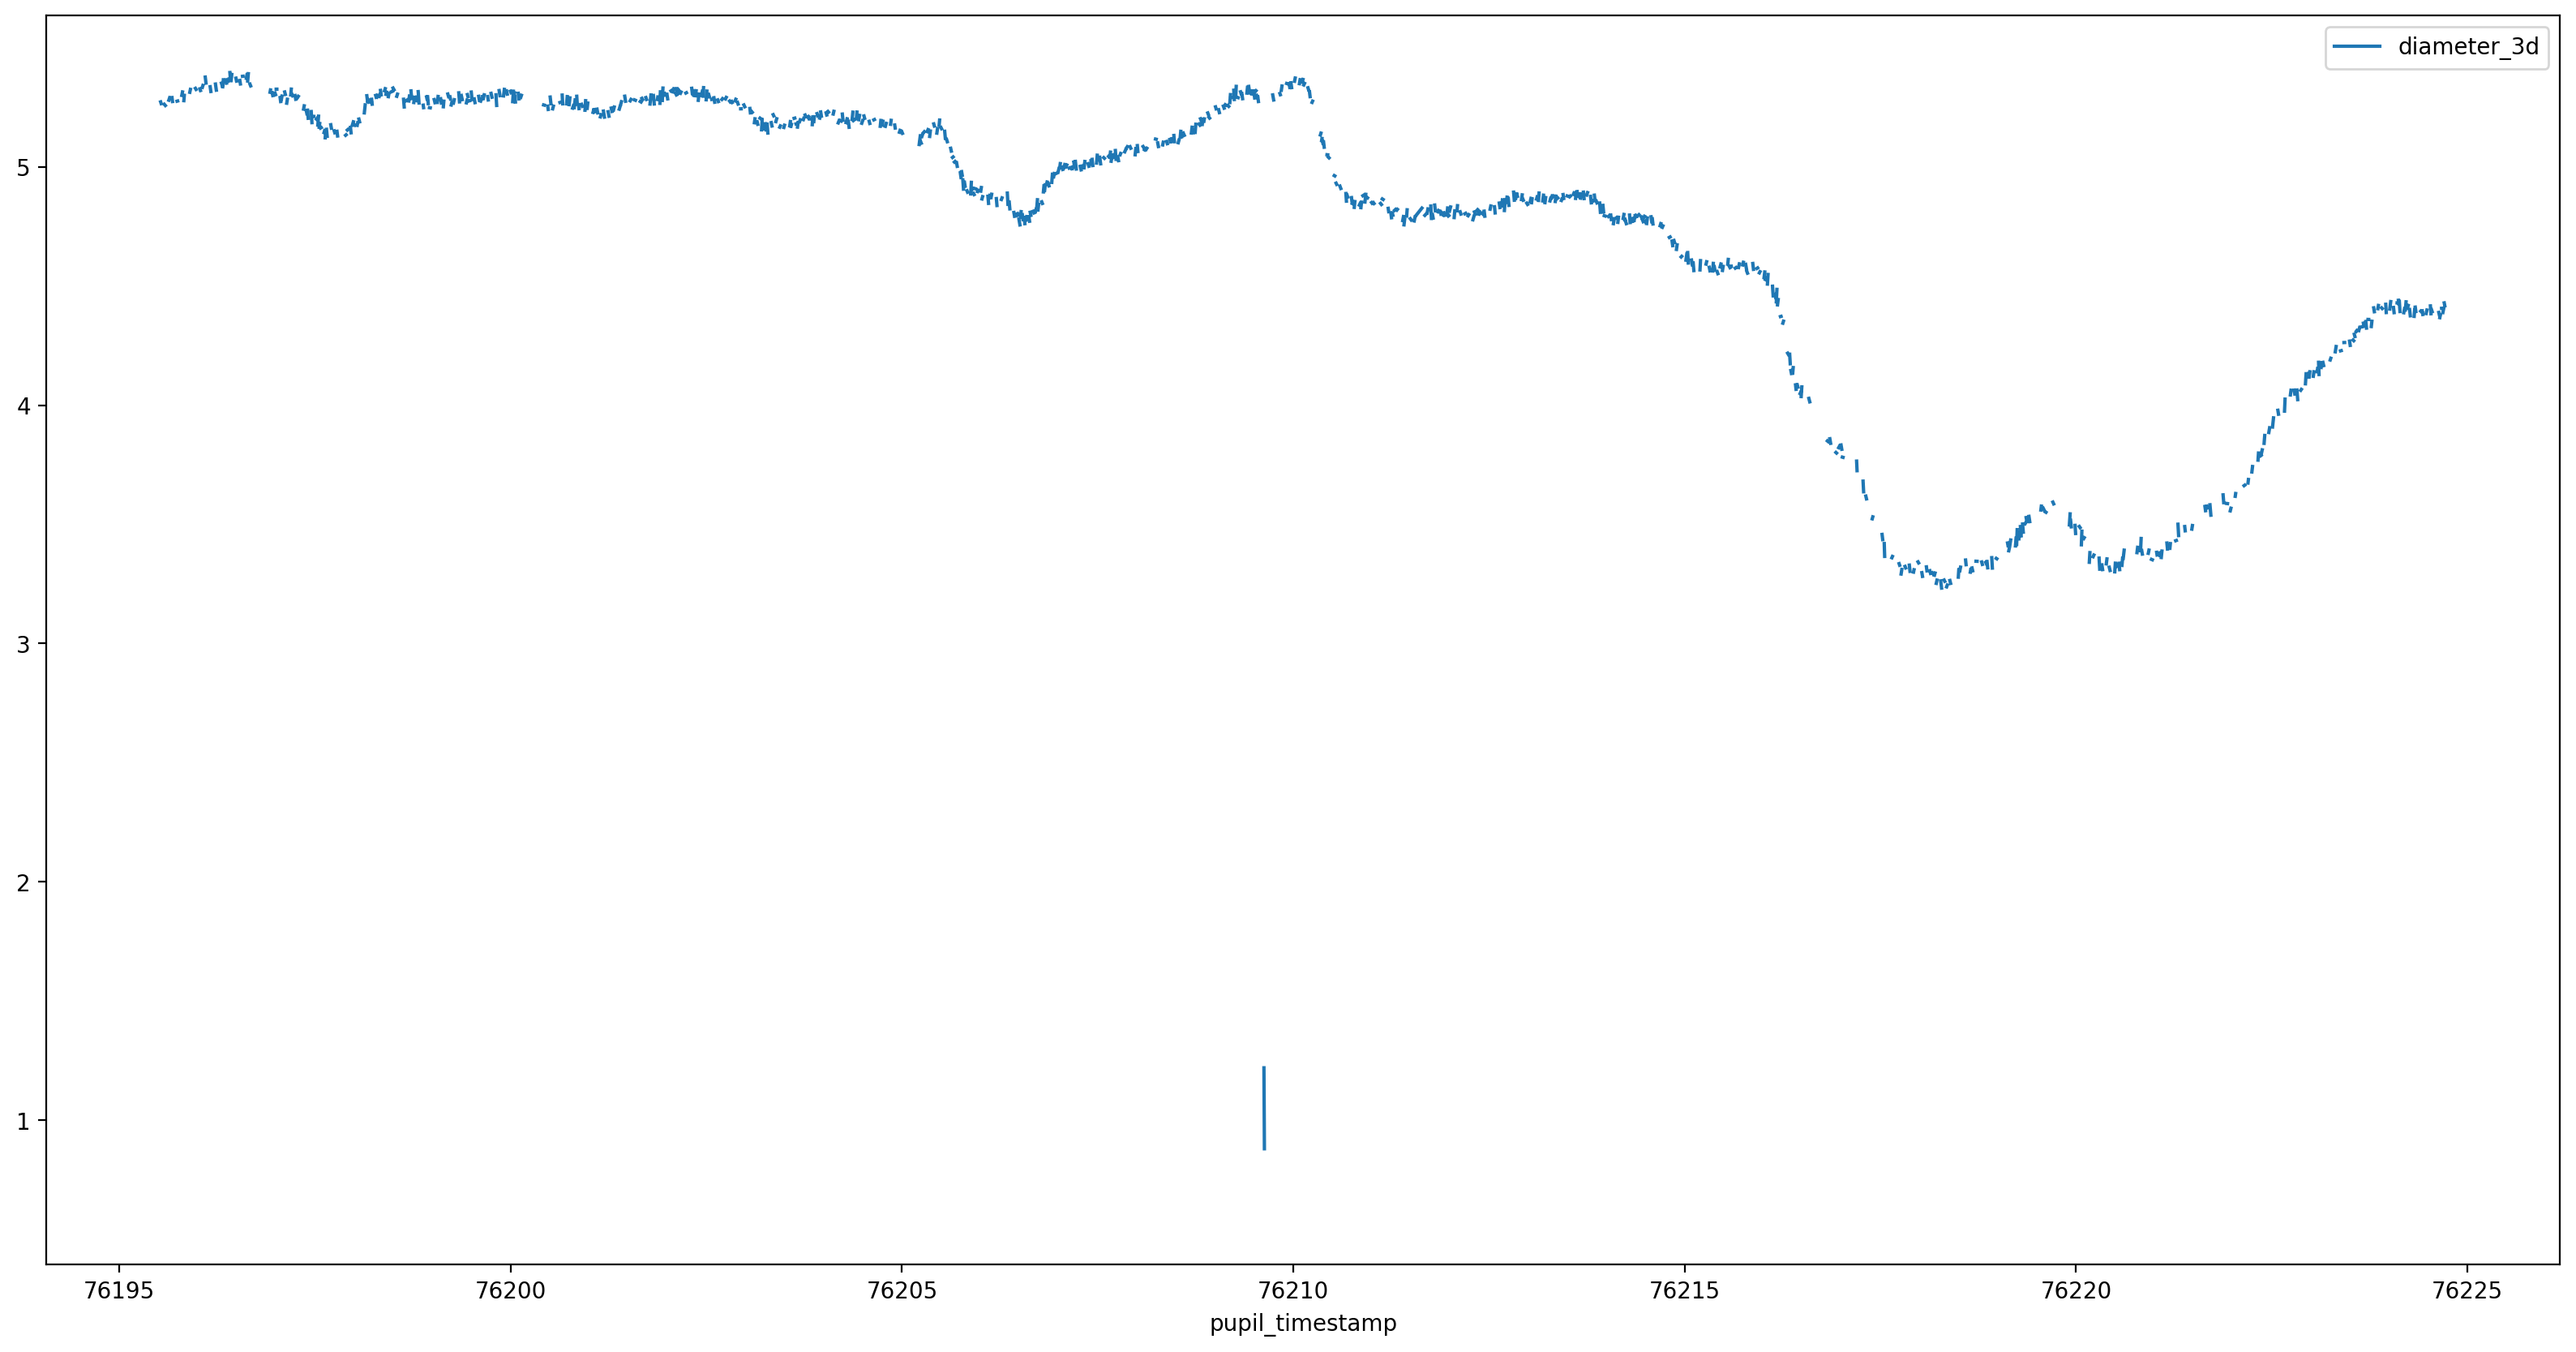

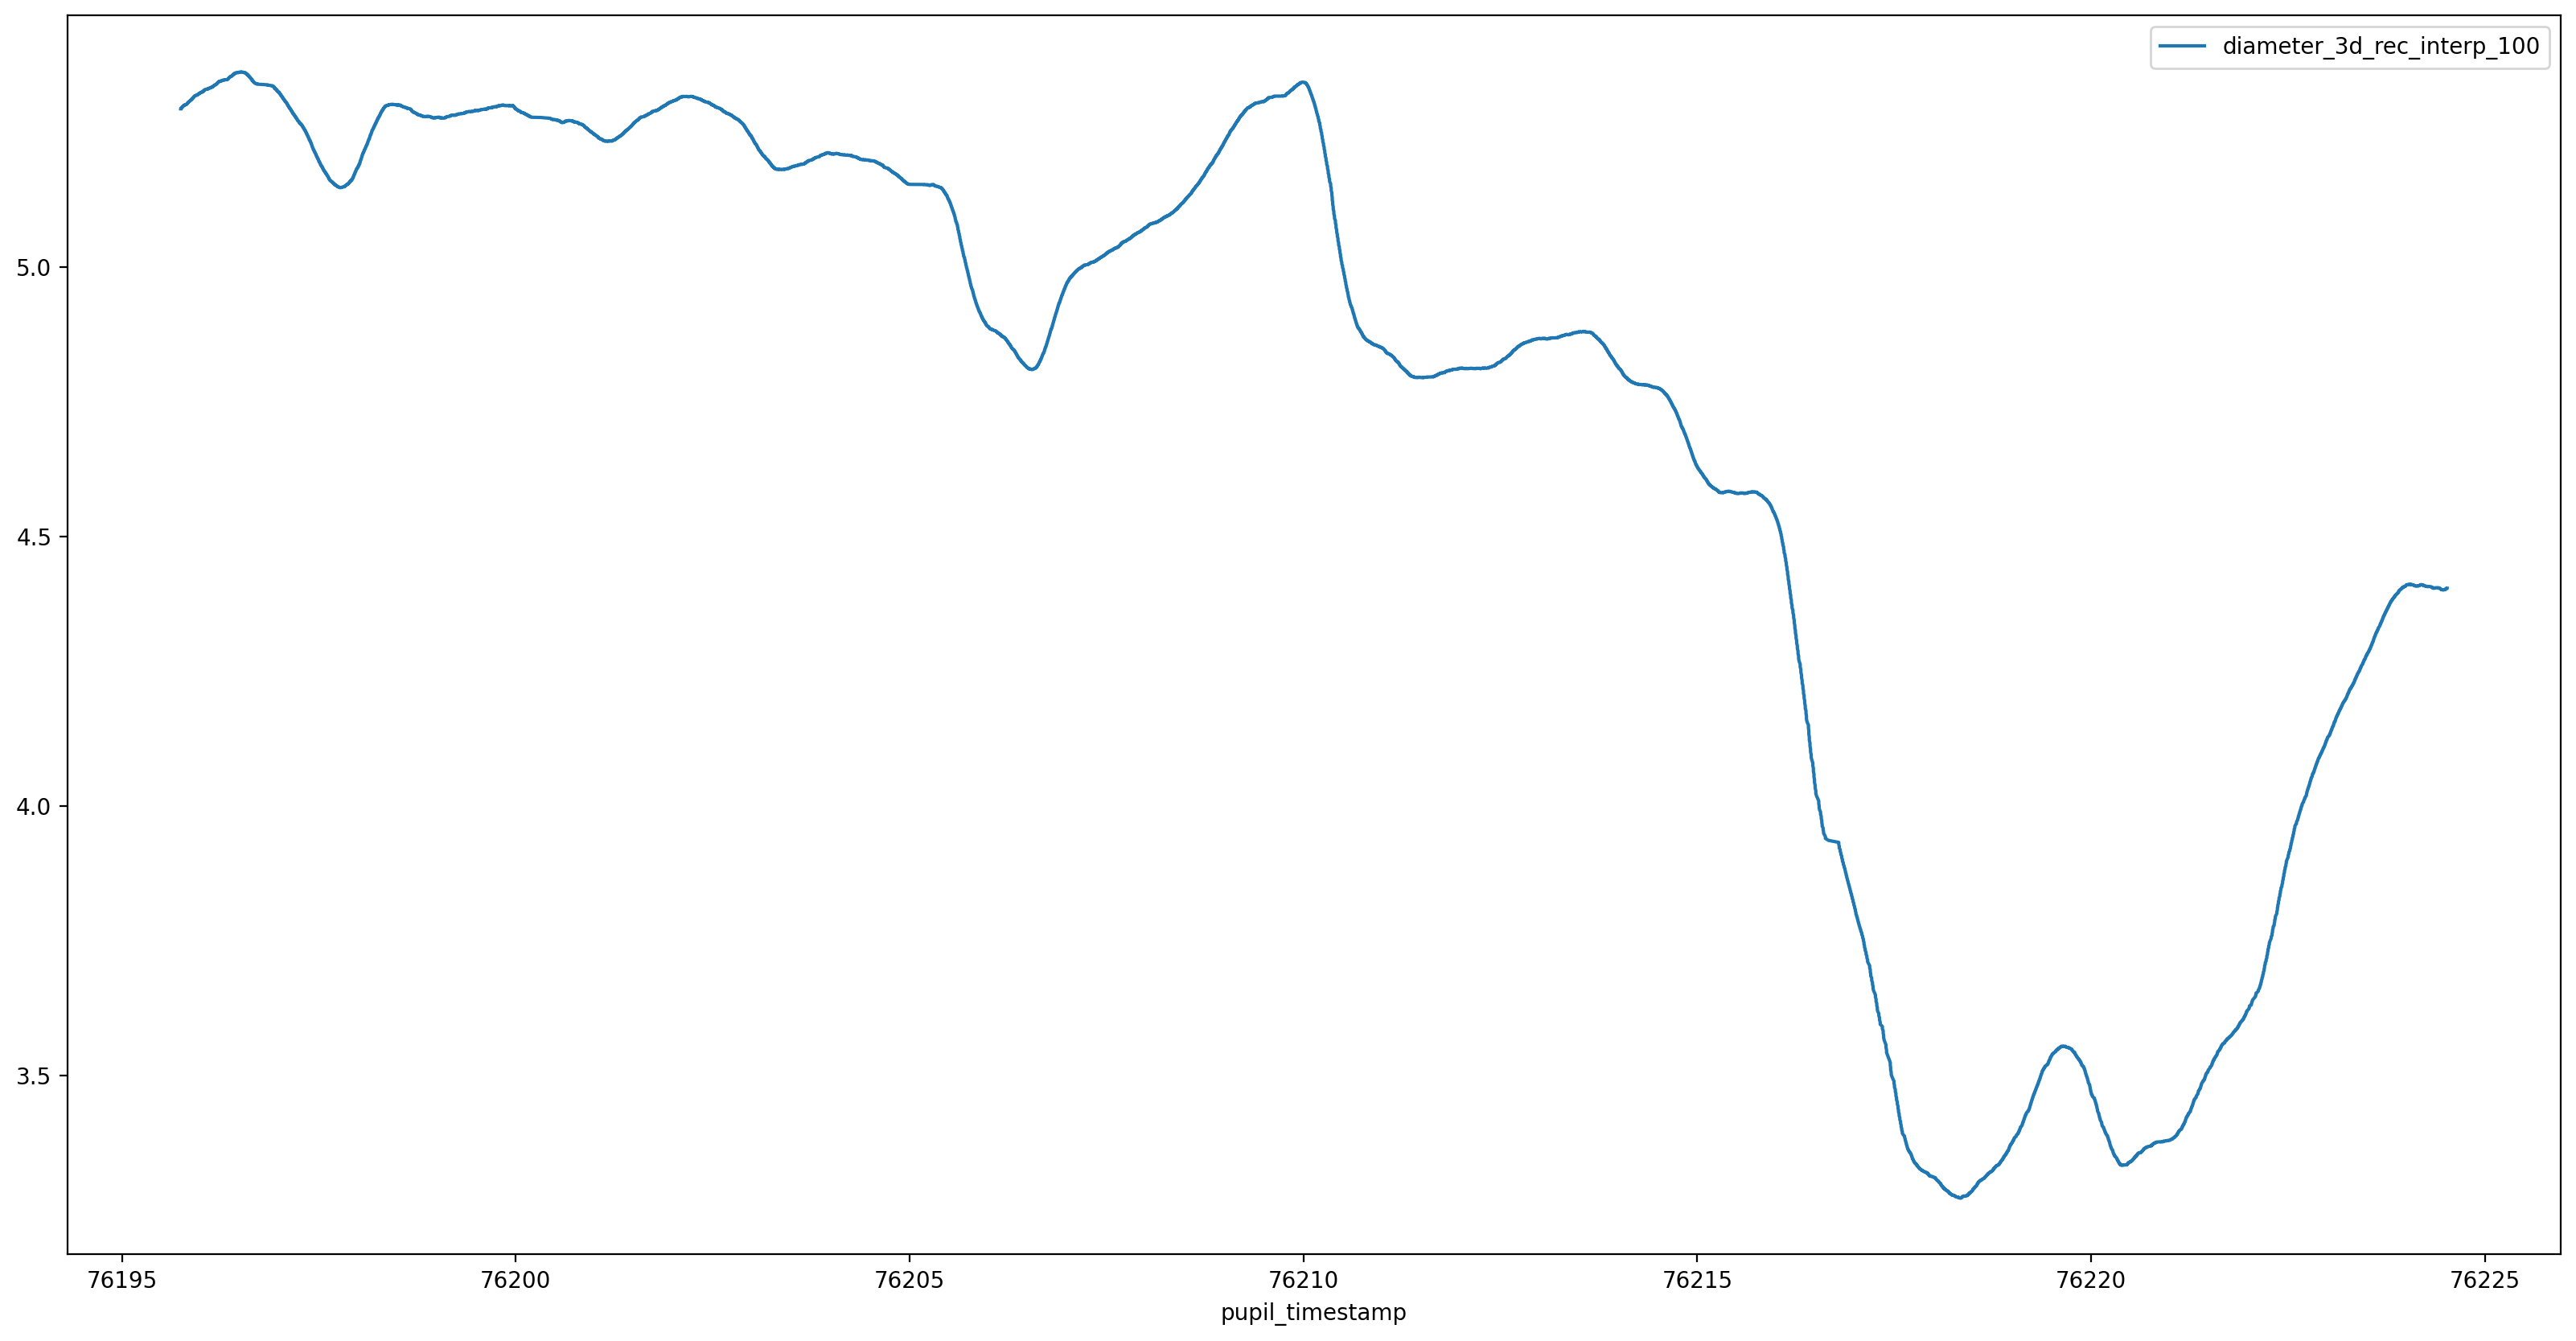

In [43]:
def reconstruct3d(eye, window_size=100):
    # Remove blinks.
    eye['diameter_3d_interp']=eye['diameter_3d'].interpolate(method='linear')
    eye['diameter_3d_rec']=checkdata.blinkreconstruct(eye['diameter_3d_interp'], 
                                                      vt_start=10/40.0,vt_end=5/40.0,
                                                      mode='advanced')
    # blinkreconstruct replaces the bliks with NaN with mode='advanced',
    # so we interpolate the gaps and low pass the result to obtain something. 
    eye['diameter_3d_rec_interp']=eye['diameter_3d_rec'].interpolate(method='linear')
    # Use moving average + recenter as low pass.
    eye['diameter_3d_rec_interp_100']=eye['diameter_3d_rec_interp'].rolling(window=window_size).mean().shift(-window_size//2)

reconstruct3d(eye)
eye.plot(x='pupil_timestamp', y='diameter_3d_rec', kind='line')
eye.plot(x='pupil_timestamp', y='diameter_3d_rec_interp', kind='line')
eye.plot(x='pupil_timestamp', y='diameter_3d', kind='line')
eye.plot(x='pupil_timestamp', y='diameter_3d_rec_interp_100', kind='line')


In [50]:
import preprocessing
importlib.reload(preprocessing)

display(subject_id)
display(data_dir)

'PJ02_1_Ruhe'

'../data/groesse/3.4Stimulation/'

In [75]:
importlib.reload(preprocessing)
preprocessing.process(0,'diameter',subject_id,"Stimulation","3.4",data_dir,display)
display("OK")

'Starting process2'

'Loop through each annotation timestamp and slice the data'

'The 0.02 quantile of pupil size for confidence >= 0.6 is 0.61.'

'Loop through each annotation timestamp and create a list with the dataframes and a variable for each dataframe'

'preprocess and slice data'

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

pandas.core.series.Series

'apply timeslots'

'merge dataframes'

'save processed data to ../data/groesse/3.4Stimulation//PJ02_1_Ruhe_Stimulation_eye_id0_diameter_list.csv and ../data/groesse/3.4Stimulation//PJ02_1_Ruhe_Stimulation_eye_id0_diameter_mean.csv'

,time_slot,eye_id,diameter
0,0.0,eye_id0,93.777089
1,1.0,eye_id0,91.826267
2,2.0,eye_id0,91.546712
3,3.0,eye_id0,92.686915
4,4.0,eye_id0,92.635773
...,...,...,...
996,996.0,eye_id0,91.460544
997,997.0,eye_id0,93.390285
998,998.0,eye_id0,91.707764
999,999.0,eye_id0,92.959026


'OK'